In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
train.loc[:, train.isnull().mean() < 0.5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [76]:
percent_amount = (train.notna().sum() / len(train)) * 100
percent_amount

Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.260274
LotArea          100.000000
                    ...    
MoSold           100.000000
YrSold           100.000000
SaleType         100.000000
SaleCondition    100.000000
SalePrice        100.000000
Length: 81, dtype: float64

In [77]:
percent_amount.sort_values(ascending=True).head(20)

PoolQC            0.479452
MiscFeature       3.698630
Alley             6.232877
Fence            19.246575
MasVnrType       40.273973
FireplaceQu      52.739726
LotFrontage      82.260274
GarageYrBlt      94.452055
GarageType       94.452055
GarageFinish     94.452055
GarageQual       94.452055
GarageCond       94.452055
BsmtExposure     97.397260
BsmtFinType2     97.397260
BsmtFinType1     97.465753
BsmtCond         97.465753
BsmtQual         97.465753
MasVnrArea       99.452055
Electrical       99.931507
KitchenQual     100.000000
dtype: float64

In [78]:
missing_drop = percent_amount.sort_values(ascending=True).head(6).index
train.drop(columns=missing_drop, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [91]:
# Calculate the percentage of non-missing values and sort to get the top 20 columns with the most missing values
(train.notna().mean() * 100).sort_values(ascending=True).head(20)

LotFrontage      82.260274
GarageType       94.452055
GarageYrBlt      94.452055
GarageFinish     94.452055
GarageQual       94.452055
GarageCond       94.452055
BsmtFinType2     97.397260
BsmtExposure     97.397260
BsmtCond         97.465753
BsmtQual         97.465753
BsmtFinType1     97.465753
MasVnrArea       99.452055
Electrical       99.931507
BsmtHalfBath    100.000000
BsmtFullBath    100.000000
HalfBath        100.000000
BedroomAbvGr    100.000000
GrLivArea       100.000000
LowQualFinSF    100.000000
2ndFlrSF        100.000000
dtype: float64

In [94]:
# Calculate the percentage of non-missing values for each column
percent_non_missing = (train.notna().mean() * 100)

# Get a list of columns where the percentage of non-missing values is less than 100
cols_missing = [col for col in train.columns if percent_non_missing[col] < 100]
cols_missing

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [96]:
train[cols_missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [97]:
# Identify numerical columns (integers and floats)
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

# Identify categorical columns (object type)
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']

# Calculate the median for numerical columns and fill missing values with the median
for col in numerical_cols:
    median = train[col].median()
    train[col].fillna(median, inplace=True)

# Calculate the mode for categorical columns and fill missing values with the mode
for col in categorical_cols:
    mode = train[col].mode()[0]  # mode() returns a Series, select the first element
    train[col].fillna(mode, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [98]:
(train.notna().mean() * 100).sort_values(ascending=True).head(20)

Id              100.0
Functional      100.0
TotRmsAbvGrd    100.0
KitchenQual     100.0
KitchenAbvGr    100.0
BedroomAbvGr    100.0
HalfBath        100.0
FullBath        100.0
BsmtHalfBath    100.0
BsmtFullBath    100.0
GrLivArea       100.0
LowQualFinSF    100.0
2ndFlrSF        100.0
1stFlrSF        100.0
Electrical      100.0
CentralAir      100.0
Fireplaces      100.0
HeatingQC       100.0
GarageType      100.0
GarageFinish    100.0
dtype: float64

In [99]:
len(numerical_cols), len(categorical_cols)

(38, 37)

## Visualizations

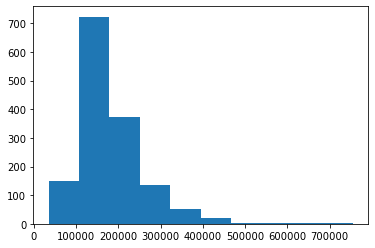

In [100]:
plt.hist(train['SalePrice'])
plt.show()